# ¡Hola, Ilse!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# Proyecto Sprint 9 - Ilse Salinas
## Descripción general
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

### Preprocesamiento de la información

In [1]:
# Se importan todas las librerias utilizadas para la elaboracion de este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estas otras son para la generacion del modelo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abrimos y examinamos el dataset del proyecto
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
# Imprimimos un ejemplo del dataframe para ver como se muestran los datos de las columnas
print(df.sample(5))

      RowNumber  CustomerId          Surname  CreditScore Geography  Gender  \
1962       1963    15692416        Aikenhead          358     Spain  Female   
4689       4690    15737832        Robertson          771     Spain    Male   
2539       2540    15569571         Davydova          584   Germany  Female   
4347       4348    15645271  Radcliffe-Brown          615   Germany    Male   
9052       9053    15597949          Gilbert          768   Germany  Female   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1962   52     8.0  143542.36              3          1               0   
4689   45     0.0  139825.56              1          0               0   
2539   46     6.0   87361.02              2          1               0   
4347   24     8.0  108528.07              2          0               0   
9052   47     5.0  104552.61              1          1               0   

      EstimatedSalary  Exited  
1962        141959.11       1  
4689        1709

Antes de continuar con el análisis de los datos e implementación de modelos de machine learning, es necesario corregir algunos errores presentados en la información y también averigurar si existen duplicados para que no interfiera con el resultado final.

En este caso, se necesita hacer enfásis en la columna Tenure ya que se necesita tanto reemplazar todos los datos nulos con ceros y cambiar su tipo de dato de flotante a entero ya que representa el período durante el cual ha madurado el depósito a plazo fijo de un cliente en años. A pesar de que en la columna Surname se ha notado que existen apellidos incompletos con signos de interrogación al final, para no obstruir los resultados del análisis posterior no se descartarán pero simplemente se quiere haceer esta acalaración al lector.

Después se verificará si existen valores duplicados para que aquellos que los estén sean descartados. Por último, se modificarán los nombres de las columnas para que éstos sean más legibles tanto para quienes hagan una revisión o análisis como para los mismos clientes. 

In [4]:
# Sustituimos los valores nulos de la columna Tenure por ceros
# Cambiamos el tipo de dato de la columna Tenure de flotante a entero
df['Tenure'].fillna(0, inplace=True)
df['Tenure'] = df['Tenure'].astype(int)
null_in_Tenure = df['Tenure'].isnull().any()

if null_in_Tenure:
    print("Todavía hay valores nulos en la columna 'Tenure'.")
else:
    print("No hay valores nulos en la columna 'Tenure' después de reemplazarlos por ceros.")

No hay valores nulos en la columna 'Tenure' después de reemplazarlos por ceros.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buena decisión en cuanto a la variable *Tenure*
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La columna *SurName* NO es útil para el modelo de machine learning, vale la pena entonces eliminar filas completas por una columna que debes eliminar completamente del modelo?
</div>


In [5]:
# Idetificamos duplicados y en caso de que haya se eliminan del dataframe
duplicates = df.duplicated()

if duplicates.any():
    print("Se encontraron valores duplicados en el DataFrame.")
    print("Filas duplicadas:")
    print(df[duplicates])
else:
    print("No se encontraron valores duplicados en el DataFrame.")

No se encontraron valores duplicados en el DataFrame.


In [6]:
# Renombramos las columnas del dataset para una mejor legibilidad
df.rename(columns={'RowNumber': 'Row_Number', 'CustomerId': 'Customer_Id', 'CreditScore':'Credit_Score','NumOfProducts':'Num_Products', 'HasCrCard':'Has_Cr_Card', 'IsActiveMember':'Active_Member', 'EstimatedSalary':'Estimated_Salary'}, inplace=True)
df.columns = [col.lower() for col in df.columns]
print(df.columns)

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_products', 'has_cr_card',
       'active_member', 'estimated_salary', 'exited'],
      dtype='object')


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Podrias aplicar el método lower además de esto para dejar los nombres en minusculas
</div>


### Ánalisis de la información
Una vez que se tiene preparada la información del dataframe, procedemos a la elaboración del modelo de aprendizaje supervisado en donde primero hay que estipular cuales serán las características y objetivo. El propósito del proeyecto es predecir que clientes son los que tienen mayor probabilidad de dejar los servicios de Beta Bank, es por esta razón que el objetivo será la columna 'exited' mientras que el resto serán tratadas como características. Esta decisión fue tomada de esta manera ya que todo dependerá si el usuario sigue en existencia o se ha dado de baja de su cuenta bancaria. 

#### Análisis de objetivo y características
Antes de dividirla información del dataframe en los conjuntos de entrenamiento y validación para poder generar el modelo, primero verificaremos cuantos clientes tienen actividad y cuantos no. Este paso es para examinar el equilibrio de clases ya que al tratase de un problema de clasificación binaria, un conjunto de datos está equilibrado si la cantidad de ejemplos en cada clase es más o menos similar.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
La variable target no es *Exit*?
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante </b> <a class="tocSkip"></a>
    
Lo había pensando desde el punto de vista si el cliente seguía teniendo actividad en su cuenta o no pero si tiene razón ya que el enfoque es si se ha salido o no y verificar con base en esta información cuantos más pueden salirse, muchas gracias por la observación. También no leí bien las instrucciones una disculpa.
</div>

In [7]:
# Contamos cuantos clientes tienen actividad y cuantos otros no
target_counts = df['exited'].value_counts()

print("Conteo de instancias por clase en la columna exited:")
print(target_counts)

Conteo de instancias por clase en la columna exited:
0    7963
1    2037
Name: exited, dtype: int64


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Añade un analisis descripto de las features a considerar en el modelo.
</div>


Se puede observar que no existe un equilibrio entre las clases de la columna 'exited', ya que hay una mayor cantidad de clientes que aún siguen con su cuenta bancaria representados con el valor cero el cual son 7963 y muy pocos que se han salido rpresentado con el valor uno que son 2037. 

Este análisis es particularmente relevante, dado que el objetivo es predecir cuántos clientes podrían cancelar su cuenta bancaria. La desigualdad en la distribución de clases puede tener un impacto significativo en la generación del modelo, ya que podría subestimar el número real de usuarios que cancelarán haciéndolo ver en este caso con el desbalanceo como un menor impacto de lo que realmente puede ser.

Antes de generar el modelo con este desequilibrio en las clases, primero se describirán las características relevantes para el modelo ya que el dataframe puede contener columnas que no sean de tanta relevancia para el resultado final. 

Se puede decir de forma inicial que las columnas categóricas como surname, gener y geogrpahy no son relevantes para la decisión del cliente en caso de salir del servicio. Adicional a este descarte, se ha decidio usar una matriz de correlación para identificar que tanta relación tienen las columnas restantes con el obejtivo 'exited'. 
Hay que recordar que los valores de la matriz pueden ser positivos, negativos o incluso cero, a continuación se describe cada una de las situaciones:

- Cercano a 1: Fuerte correlación positiva (cuando la característica aumenta, es probable que "exited" también aumente).
- Cercano a -1: Fuerte correlación negativa (cuando la característica aumenta, es probable que "exited" disminuya).
- Cercano a 0: Poca o ninguna correlación

A modo de ejemplo, si en el caso de credit_score tiene una correlación de -0.28 con exited, significa que a medida que el crédito del cliente baja, es más probable que el cliente se vaya (relación negativa). Aunque también si age tiene una correlación de 0.35 con exited, significa que a medida que la edad del cliente aumenta, es más probable que el cliente se vaya (relación positiva).

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Tus datos SI estan balanceados, cuando hagas el cambio a la columna *Exit* notaras que el desbalance. Para la que estas considerando ahora NO lo hay
</div>


In [8]:
# Descartamos la columnas categoricas del analisis antes de la matriz de correlacion
df = df.drop(columns=['surname','geography','gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   credit_score      10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_products      10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


exited              1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
customer_id        -0.006248
has_cr_card        -0.007138
tenure             -0.013319
row_number         -0.016571
credit_score       -0.027094
num_products       -0.047820
active_member      -0.156128
Name: exited, dtype: float64


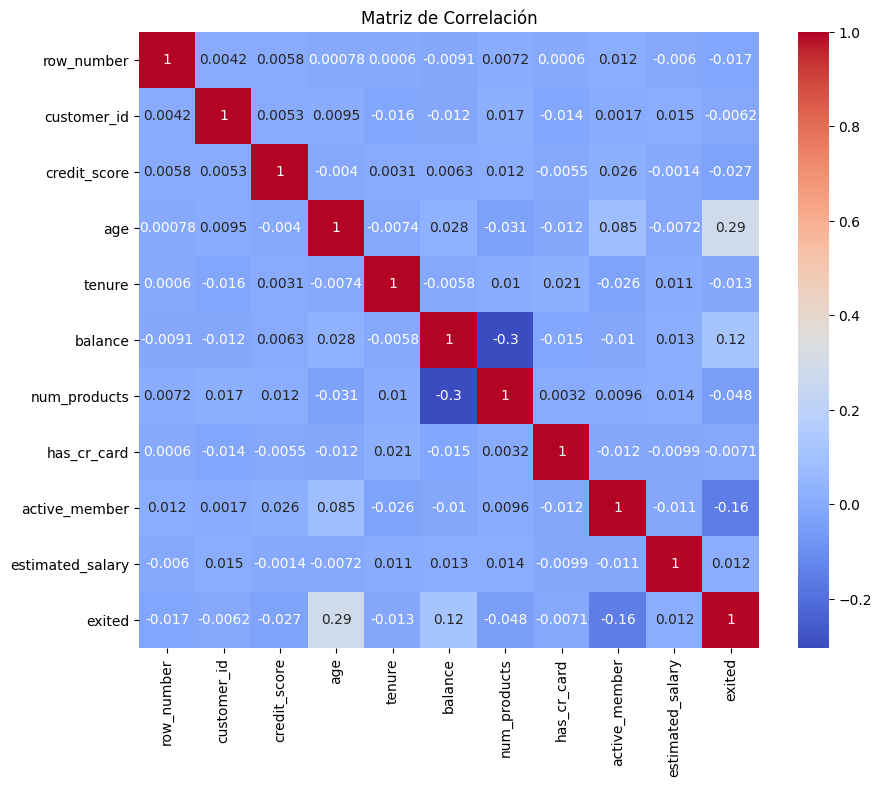

In [9]:
# Generamos la matriz de correlacion para el dataframe
corr_matrix = df.corr()

# Mostramos la correlación con la variable objetivo 'exited'
print(corr_matrix['exited'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Conclusión

Al observar la matriz de correlación, se puede observar que las columnas estimated_salary, customer_id, has_cr_card, tenure y row_number tienen valores muy cercanos al cero con respecto a exited haciendo que éstas sean poco relevantes para el análisis. No obstante estas columnas no se descartarán como las anteriores pero si tomara poca relevancia que si un usuario futuro decida retirarse del servicio haya sido por poseer una tarjeta de crédito o no, ni por el salario estimado o por el período durante el cual ha madurado el depósito a plazo fijo.    

#### Generación del modelo de aprendizaje
##### Equilibrio de clases - Modelo desequilibrado

Es esencial abordar este desequilibrio para garantizar que el modelo tenga en cuenta adecuadamente todas las posibles eventualidades y produzca resultados más precisos. Para demostrar lo anterior, a continuación se muestra el modelo considerandolo y después sin tomar en cuenta para poder comparar ambos resultados. 

Se manejarán los modelos de regresión logística, árbol de desiciones y bosque para encotrar las métricas, hacer comparación entre ellas e identificar el mejor modelo.

######  Modelo de Regresión Logística

In [10]:
# Objetivo y caracteristicas
target = df['exited']
features = df.drop('exited', axis=1)

# Como el escalamiento solo se hace en variables numericas y no binarias se han descartado : 'exited', 'has_cr_card' y 'active_memeber'
# Otras como row_number y customer_id ha sido descartadas del escalamiento porque no es necesario

# Escalado de características
numeric_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features[numeric_columns])
features[numeric_columns] = scaler.transform(features[numeric_columns])

In [11]:
# Dividimos el conjunto de datos en entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

# Entrenamos el modelo de regresión logística
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

# Realizamos las predicciones en el conjunto de validación
predicted_valid = model.predict(features_valid)

print("Rendimiento del modelo con desequilibrio de clases:")
print(classification_report(target_valid, predicted_valid))
print()

Rendimiento del modelo con desequilibrio de clases:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1965
           1       0.00      0.00      0.00       535

    accuracy                           0.79      2500
   macro avg       0.39      0.50      0.44      2500
weighted avg       0.62      0.79      0.69      2500




/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
- Debes eliminar las columnas que no aportan información relevante respecto al problema, tal como Surname, que otras columnas podrias eliminar segun este criterio?
    
- El escalamiento es solo para variables númericas NO binarias
</div>


La evaluación del rendimiento del modelo mediante la métrica classification_report de scikit-learn proporciona varias métricas de evaluación clave como la precisión, recall, f1-score, support, accuracy, entre otra más. A continuación se define que es lo que cada una de estas métricas busca y lo que representa el valor como resultado.

- La precisión es la proporción de verdaderos positivos sobre el número total de elementos que fueron etiquetados como positivos (verdaderos positivos + falsos positivos). La interpretación que esto tiene sobre el desarrollo del proyecto es que para la clase 0 (clientes que no se han ido del servicio bancario) es del 79%, lo que significa que el 79% de los clientes que el modelo predijo como no habiéndose ido realmente no se han ido. 

- El recall es la proporción de verdaderos positivos sobre el número total de elementos que realmente son positivos (verdaderos positivos + falsos negativos). La interpretación que esto tiene sobre el desarrollo del proyecto es que para la clase 0,el recall para la clase 0 es del 100%, lo que significa que el modelo identificó correctamente a todos los clientes que no se han ido.

- El f1-score es la media armónica de la precisión y el recall. Es una métrica útil cuando necesitas un balance entre precisión y recall. La interpretación que esto tiene sobre el desarrollo del proyecto es que para la clase 0, el f1-score es del 88%.

Para estas tres métricas no se tiene información sobre ellas con respecto a la clase 1, es decir, los clientes que si se han ido, y esto muy prpbablemente se deba al desequlibrio. 

- El support es el número de ocurrencias de cada clase en el conjunto de datos. La interpretación que esto tiene sobre el desarrollo del proyecto es que para la clase 0, el support es 1965, lo que significa que hay 1965 clientes que aún están registrados y ocupan el servicio bancario. Por otro lado, para la clase 1, el support es 535, lo que significa que hay 535 clientes que lo han descartado.

- La exactitud es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el número total de predicciones. La exactitud global del modelo es 0.79, lo que significa que el 79% de todas las predicciones fueron correctas.

######  Modelo de Árbol de Desiciones

In [12]:
# Entrenamos el modelo de árbol de decisión
model_2 = DecisionTreeClassifier(random_state=12345)
model_2.fit(features_train, target_train)

# Realizamos las predicciones en el conjunto de validación
predicted_valid_2 = model_2.predict(features_valid)

print("Rendimiento del modelo de árbol de decisión con desequilibrio de clases:")
print(classification_report(target_valid, predicted_valid_2))
print()

Rendimiento del modelo de árbol de decisión con desequilibrio de clases:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1965
           1       0.48      0.46      0.47       535

    accuracy                           0.78      2500
   macro avg       0.67      0.66      0.67      2500
weighted avg       0.78      0.78      0.78      2500




######  Modelo de Bosque Aleatorio

In [13]:
# Inicializamos el modelo Random Forest
rf_model = RandomForestClassifier(random_state=12345)

# Entrenamos el modelo con tus datos de entrenamiento
rf_model.fit(features_train, target_train)

# Realizamos predicciones en tus datos de validación
predicted_valid_rf = rf_model.predict(features_valid)

print("Rendimiento del modelo Random Forest con el desequilibrio de clases:")
print(classification_report(target_valid, predicted_valid_rf))

Rendimiento del modelo Random Forest con el desequilibrio de clases:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1965
           1       0.76      0.41      0.53       535

    accuracy                           0.85      2500
   macro avg       0.81      0.69      0.72      2500
weighted avg       0.84      0.85      0.83      2500



A diferencia del modelo anterior, en los últimos dos si se reflejan datos para la clase 1 que es de aquellos usuarios que salieron del sistema bancario. Esto se debe a diferentes factores como hiperparámetros establecidos, capacidad de captura de patrones ya que Los modelos de árbol de decisión pueden capturar relaciones no lineales y decisiones más complejas en los datos y también el desbalance de clases en los datos, ya que el árbol de decisión podría ser más efectivo para manejarlo que la regresión logística porque al ser un modelo no paramétrico, los árboles de decisión pueden adaptarse mejor a las distribuciones desiguales de las clases y mejor aún los bosques.

Conclusión

Este modelo que considerar el desequilibrio de clases proporciona las métricas anteriores, no obstante la aplicación de éste es errónea hay un desbalance significativo entre las clases en los datos de entrenamiento y algunos modelos pueden tener dificultades para predecir la clase minoritaria como es el caso de la regresión logística. Por ejemplo, si la clase 1 (clientes que se han ido) está subrepresentada en comparación con la clase 0 (clientes que no se han ido), es posible que un modelo tenga dificultades para identificar correctamente los casos positivos. Es importante que este balcaneada entonces porque así podremos encontrar y predecir cuántos más pueden dejarlo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El analisis del modelo esta perfecto! te felicito
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Prueba con otros modelos para poder contrastar 
</div>


##### Equilibrio de clases - Modelo equilibrado
Se ha visto que es indispensable generar un equilibrio entre las clases 0 y 1 ya que hay más de la clase 0. En este caso lo ideal sería generarlo a través del sobremuestreo de la clase 1 o el submuestreo de la clase 0. A continuación se observa cada uno de estos métodos y como impacta en las métricas especialmente en f1_score que es requerido que al menos este en 0.59 en ambos modelos presentados anteriormente.

Para ambas funciones, es importante considerar la proporción siguiente correspondiente a la cantidad de datos que hay por clase:

Proporción = Instancias de clase 0 / Instancias de clase 1 = 7963 / 2037 ≈ 3.91
Esto significa que hay aproximadamente 3.91 veces más instancias de la clase mayoritaria que de la clase minoritaria.
Este valor lo usaremos ya sea para multiplicar la clase 1 o divividr la clase 0 hasta tener un resultado de ambas clases equilibrado. Es un aproximado pero puedo variar dependiendo de los resultados deseados.

######  Sobremuestreo y Submuestreo

In [42]:
# Esta funcion es para poder hacer un sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [43]:
# Esta funcion es para poder hacer un submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

######  Modelo de Regresión Logística con sobremuestreo y submuestreo

In [44]:
# Entrenamos al modelo con el sobremuestreo
model_3 = LogisticRegression(random_state = 12345, solver='liblinear')
model_3.fit(features_upsampled,target_upsampled)
predicted_valid_3 = model_3.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_3))

F1: 0.2994895065229722


In [45]:
# Entrenamos al modelo con el submuestreo
model_4 = LogisticRegression(random_state = 12345, solver='liblinear')
model_4.fit(features_downsampled,target_downsampled)
predicted_valid_4 = model_4.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_4))

F1: 0.0


######  Modelo de Árbol de Desiciones con sobremuestreo y submuestreo

In [46]:
model_5 = DecisionTreeClassifier(random_state=12345)
model_5.fit(features_upsampled,target_upsampled)
predicted_valid_5 = model_5.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_5))

F1: 0.46241674595623217


In [47]:
model_6 = DecisionTreeClassifier(random_state=12345)
model_6.fit(features_downsampled,target_downsampled)
predicted_valid_6 = model_6.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_6))

F1: 0.4770784770784771


######  Modelo de Bosque Aleatorio con sobremuestreo y submuestreo

In [48]:
model_rf_2 = RandomForestClassifier(random_state=12345)
model_rf_2.fit(features_upsampled,target_upsampled)
predicted_valid_rf_2 = model_rf_2.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_rf_2))

F1: 0.5652173913043478


In [49]:
model_rf_3 = RandomForestClassifier(random_state=12345)
model_rf_3.fit(features_downsampled,target_downsampled)
predicted_valid_rf_3 = model_rf_3.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid_rf_3))

F1: 0.5965583173996176


Conclusión

Se llevaron a cabo pruebas con tres modelos diferentes: regresión logística, árbol de decisiones y bosque aleatorio, con el objetivo de lograr un F1-score igual o superior a 0.59. Se implementaron técnicas de sobremuestreo y submuestreo para abordar el desequilibrio de clases en los datos, y se experimentaron con diferentes valores en ambas funciones hasta encontrar el punto óptimo que condujera al resultado deseado.

Aunque se realizaron ajustes y pruebas exhaustivas en los tres modelos, se observó que el bosque aleatorio fue el que produjo los mejores resultados. Esto se debe a que el bosque aleatorio combina las características de un árbol de decisiones en múltiples árboles, lo que permite capturar relaciones no lineales y mejorar la generalización del modelo. Como resultado, el bosque aleatorio con submuestreo logró un F1-score de 0.59 o superior, superando así las expectativas y demostrando ser la mejor opción entre los tres modelos evaluados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Resuelto: Lograste complementar con diferentes modelos obteniendo 
</div>


#### AUC-ROC del modelo
El área bajo la curva ROC (AUC-ROC) es una medida que sirve para medir qué tan bien puede distinguir un modelo entre las clases positiva y negativa, lo que es crucial en problemas de clasificación donde hay desequilibrio entre estas clases. Es una forma de evaluar la capacidad de un modelo para clasificar correctamente las instancias, incluso cuando hay más ejemplos de una clase que de la otra.
En este caso se verificará el AUC-ROC tanto en el modelo original como en el modelo con submuestreo es fundamental para comprender cómo afecta esta técnica al rendimiento del modelo. Al calcular el AUC-ROC en el modelo original, podemos tener una visión general del rendimiento del modelo sin ninguna modificación en los datos. Esto nos permite entender cómo se comporta el modelo en su estado inicial y nos sirve como punto de referencia para comparar con el rendimiento obtenido después de aplicar el submuestreo.

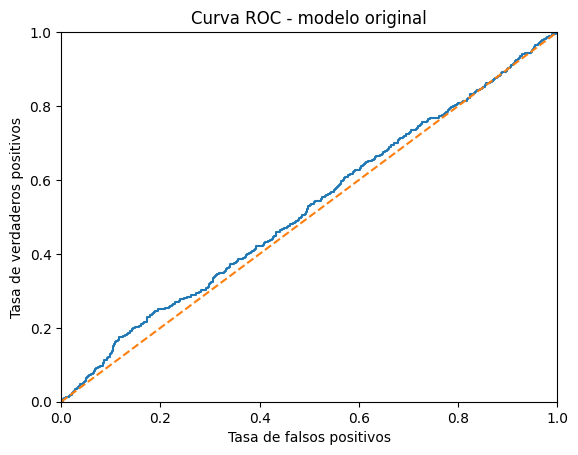

In [22]:
# Definimos ROC con los valores del modelo original
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - modelo original')
plt.show()

In [23]:
# Examinamos los valores AUC-ROC en el modelo original
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.5208313714299303


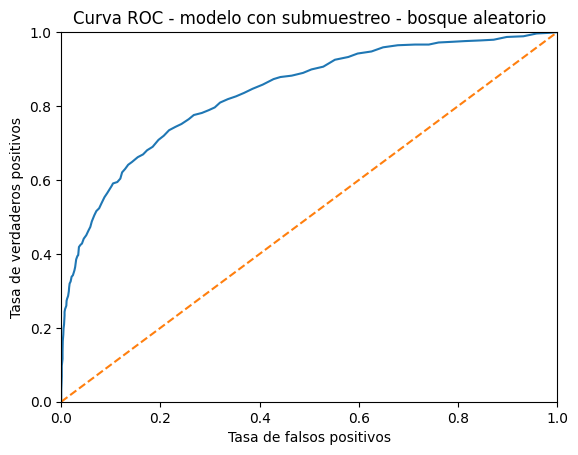

In [50]:
# Definimos ROC con los valores del modelo de bosque aleatorio con submuestreo
probabilities_valid_rf = model_rf_3.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid_rf)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - modelo con submuestreo - bosque aleatorio')
plt.show()

In [25]:
# Examinamos los valores AUC-ROC en el modelo con el submuestreo
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_2)
print(auc_roc)

0.6640912225630782


Conclusión

Un aumento en el valor del AUC-ROC de 0.52 a 0.66 después de aplicar el submuestreo sugiere una gran mejora en el rendimiento del modelo en la capacidad de distinguir entre las clases positiva y negativa. Sin embargo, dado que el aumento es pequeño, es posible que esta mejora sea marginal. Es importante tener en cuenta otros aspectos del rendimiento del modelo, como la precisión, el recall y la especificidad, para tener una evaluación más completa de su efectividad.

### Conclusión
En cuanto a identificar clientes propensos a cancelar sus cuentas bancarias, la métrica F1 es fundamental para evaluar el rendimiento del modelo de manera integral. La combinación de precisión y recall en el F1-score proporciona una medida equilibrada del rendimiento del modelo, especialmente en situaciones de desequilibrio entre las clases. Maximizar el F1-score es crucial para garantizar que el modelo identifique correctamente a los clientes propensos a cancelar sin etiquetar erróneamente a demasiados clientes que no lo están. Por lo tanto, al desarrollar y ajustar modelos de predicción de cancelaciones bancarias, es esencial tener en cuenta y optimizar el F1-score para obtener resultados precisos y útiles en la identificación de clientes propensos a cancelar sus cuentas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien resuelto! los cambios mejoraron bastante tus resultados.
Felicidades! tu analisis fue muy bueno en general y logras resaltar los aspectos más relevantes.
</div>
